In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

In [2]:
grav = 9.81

# Masa del dipolo
m = 0.01

# es la permeabilidad máxima del MetGlass
mu = 1e6

# Permeabilidad del espacio libre
mu_0 = 4*np.pi*1e-7

# Radio del anillo de corriente
a = 0.08

# Resistividad
R = 9e-5

In [3]:
k =(9*((mu*mu_0)**2)*(a**4))/(4*R)

In [4]:
def p(z):
    pz= (z**2)/(np.sqrt((z**2)+(a**2))**5)
    return pz

def f(y):
    ft= y
    return ft

def g(x,y):
    gt=-grav-(k/m)*p(x)*y
    return gt

In [5]:
t_0 = 0
# Timpo final
t_f = 6

# Altura Inicial z_0
x_0 = 10
# Velocidad Inicial z'_0
y_0 = 0

In [6]:
h=0.001

N=int((t_f-t_0)/h)

t=np.linspace(t_0,t_f,N)

In [7]:
all_xs=[]
all_ys=[]

x_n=x_0
y_n=y_0
for tn in tqdm_notebook(t):
    
    kx1=f(y_n)
    ky1=g(x_n,y_n)
    
    kx2=f(y_n+ (h/2)*ky1)
    ky2=g(x_n+(h/2)*kx1,y_n+(h/2)*ky1)
    
    kx3=f(y_n+ (h/2)*ky2)
    ky3=g(x_n+(h/2)*kx2,y_n+(h/2)*ky2)
    
    kx4=f(y_n+h*ky3)
    ky4=g(x_n+h*ky3,y_n+h*ky3)
    
    x_n = x_n+(h/6)*(kx1+2*kx2+2*kx3+kx4)
    y_n = y_n+(h/6)*(ky1+2*ky2+2*ky3+ky4)
    
    all_xs.append(x_n)
    all_ys.append(y_n)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Text(0, 0.5, 'Velocidad [m/s]')

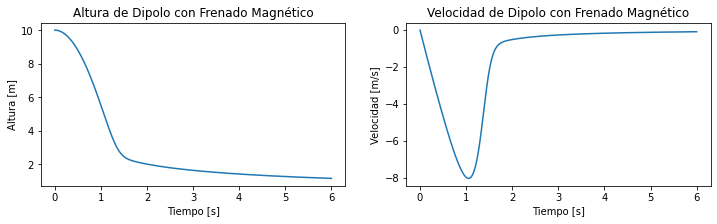

In [8]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)

plt.plot(t,all_xs)
plt.title("Altura de Dipolo con Frenado Magnético")
plt.xlabel("Tiempo [s]")
plt.ylabel("Altura [m]")

plt.subplot(1,2,2)
plt.plot(t,all_ys)
plt.title("Velocidad de Dipolo con Frenado Magnético")
plt.xlabel("Tiempo [s]")
plt.ylabel("Velocidad [m/s]")

In [9]:
x_new = np.array(all_xs)
y_new = np.array(all_ys)

In [10]:
Fz= -k* p(x_new) * y_new

Text(0, 0.5, 'Altura [m]')

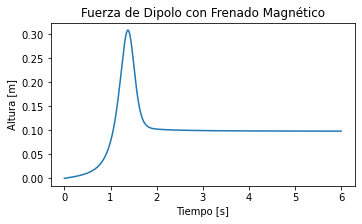

In [11]:
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)

plt.plot(t,Fz)
plt.title("Fuerza de Dipolo con Frenado Magnético")
plt.xlabel("Tiempo [s]")
plt.ylabel("Altura [m]")